> ## 추천시스템

- 콘텐츠 기반 필터링 방식

- 협업 필터링 방식

   - 최근접 이웃 협업 필터링
   - 잠재요인 협업 필터링

### 콘텐츠 기반 필터링 추천 시스템 

- 콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식.<br>
  예를 들어 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연배우, 감톡, 영화 키워드 등의 콘텐츠와 유사한 다른영화를 추천해주는 방식 

### 최근접 이웃 협업 필터링
 
- 취향이 비슷한 친구들에게 물어보는 것과 유사한 방식으로, 사용자가 아이템에 매긴 평점 정보나 상품 구매이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 것이 협업 필터링 방식

  협업 피터링의 주요 목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것. 그림에서 User1은 Item4에 대한 평점이 없음. 협업 필터링은 사용자가 평가한 다른 아이템을 기반으로 평가하지 않은 아이템의 예측 평가를 도출하는 방식




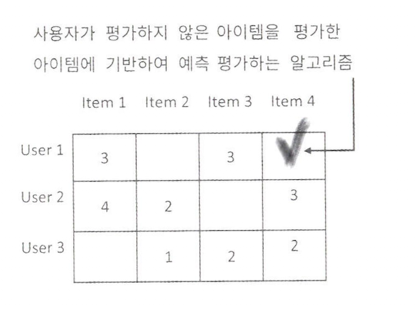

In [6]:
from IPython.display import Image
display(Image(filename="/Users/ijiseon/Desktop/협업필터링.png"))

협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며,<br>
두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행합니다. 

협업 필터링 알고리즘에 사용되는 사용자-아이템 평점 행렬에서 행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성되며, 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태가 돼야 함

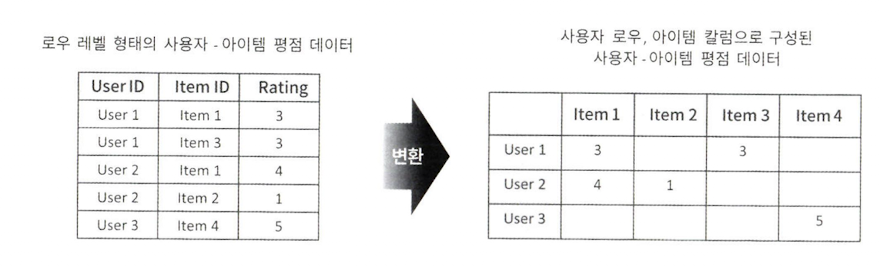

In [7]:
display(Image(filename="/Users/ijiseon/Desktop/사용자-아이템.png"))

일반적으로 이러한 사용자-아이템 평점 행렬은 많은 아이템을 열로 가지는 다차원 행렬이며, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬(Sparse Matrix) 특성을 가지고 있습니다.

최근접 이웃 협업 필터링은 메모리 협업 필터링이라고도 하며, 일반적으로 사용자 기반과 아이템 기반으로 다시 나뉠 수 있습니다. 

- User-User : customers like you also bought these items
- Item-Item : customers who bought this item also bought these items

--------------------------------------------------------------

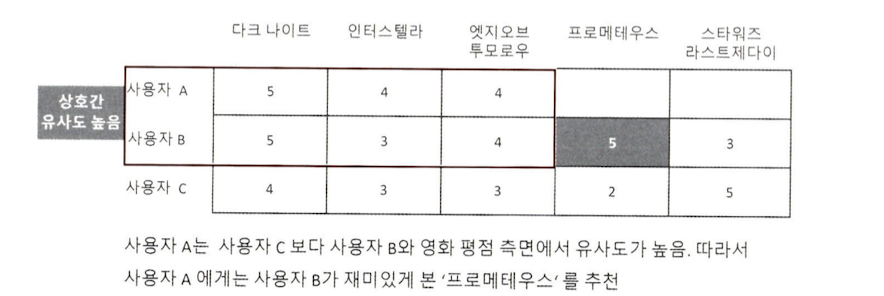

In [8]:
display(Image(filename="/Users/ijiseon/Desktop/사용자 기반.png"))

-> 사용자 기반 최근접 이웃 방식은 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 이 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식. 즉, 특정 사용자와 타 사용자 간의 유사도를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 것입니다. 

사용자A는 주요 영화의 평점 정보가 사용자C보다 사용자B와 비슷하므로, 사용자A와 사용자B는 상호 간 유사도가 매우 높다고 할 수 있음. 만약 사용자A에게 아직 보지 못한 두개의 영화인 '프로메테우스'와 '스타워즈-라스트제다이' 중 하나를 추천한다면?

"프로메테우스" - 사용자B가 재밌게 본 것이기 때문에! (사용자C가 재밌게 본 스타워즈-라스트 제다이는 의미 없음)

------------------------------------------------------------------------------

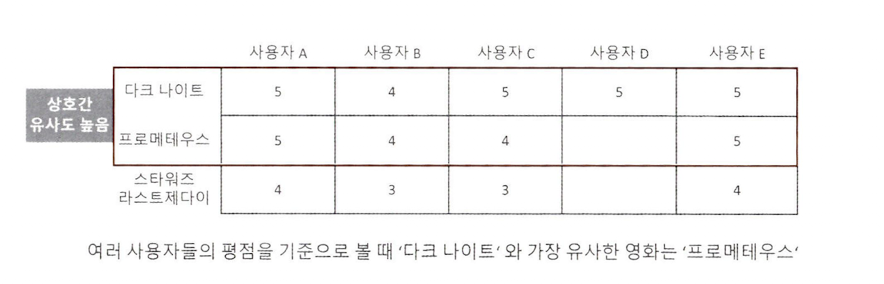

In [9]:
display(Image(filename="/Users/ijiseon/Desktop/아이템 기반.png"))

-> 아이템 기반 최근접 이웃 방식은 그 명칭이 주는 이미지 때문에 '아이템 간의 속성'이 얼마나 비슷한지를 기반으로 추천한다고 착각할 수 있음. 하지만 아이템 기반 최근접 이웃 방식은 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기분이 되는 알고리즘

아이템 기반 최근접 이웃 방식의 기반 데이터 세트는 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대 <br>
(행이 개별 아이템이고 열이 개별 사용자)


아이템 다크나이트는 스타워즈-라스트 제다이보다 프로메테우스와 사용자들의 평점 분포가 훨씬 더 비슷 -> 다크나이트를 매우 좋아하는 사용자 D에게 아이템 기반 협업 필터링은 D가 아직 관람하지 못한 프로메테우스와 스타워즈-라스트제다이 중 프로메테우스 추천 

---------------------------------------------------------------------------------

**일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음**

이유는 비슷한 영화(또는 상품)을 좋아한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문입니다. 매우 유명한 영화는 취향과 관계 없이 대부분의 사람이 관람하는 경우가 많고, 사용자들이 평점을 매긴 영화(또는 상품)의 개수가 많지 않은 경우가 일반적인데 이를 기반으로 다른 사람과의 유사도를 비교하기가 어려운 부분도 있습니다. 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘을 적용

**앞장의 텍스트 분석에서 소개된 유사도 측정 방법인 코사인 유사도는 추천 시스템의 유사도 측정에 가장 많이 적용됨. 추천 시스템에 사용되는 데이터는 피처 벡터화된 텍스트 데이터와 동일하게 다차원 희소 행렬이라는 특징이 있으므로 유사도 측정을 위해 주로 코사인 유사도를 이용**

> ## 잠재 요인 협업 필터링

<br>

- 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재요인을 추출하는데, 이러한 기법을 행렬 분해라고 합니다. 잠재 요인 협업 필터링은 사용자-아이템 평점 행렬 데이터만을 이용해 말 그대로 '잠재 요인'을 끄집어 내는 것을 의미합니다.'잠재 요인'이 어떤 것인지는 명확히 정의할 수 없습니다. 


- '잠재 요인'을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재요인 행렬과 아이템-잠재요인 행렬의 전치행렬 (즉, 잠재요인- 아이템 행렬)로 분해할 수 있으며, 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것이 잠재요인 협력 필터링 알고리즘의 골자

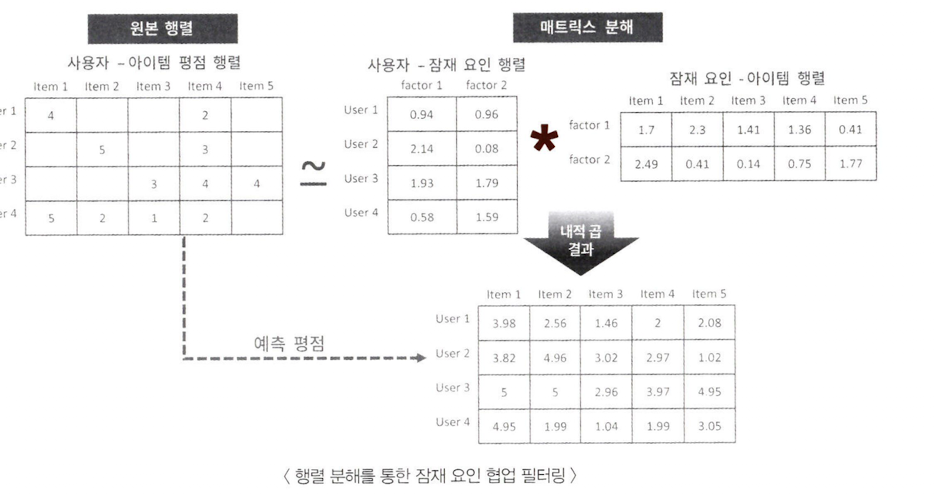

In [10]:
display(Image(filename="/Users/ijiseon/Desktop/잠재요인.png"))

행렬 분해에 의해 추출되는 '잠재 요인'이 정확히 어떤 것인지는 알 수 없지만, 가령 영화 평점 기반의 사용자 - 아이템 평점 행렬 데이터라면 영화가 가지는 장르별 특성 선호도로 가정할 수 있습니다. 

즉, 사용자-잠재요인 행렬은 사용자의 영화장르에 대한 선호도로, 아이템-잠재요인 행렬은 영화의 장르별 특성 값으로 정의할 수 있습니다

-----------------------------------------------------------------------------

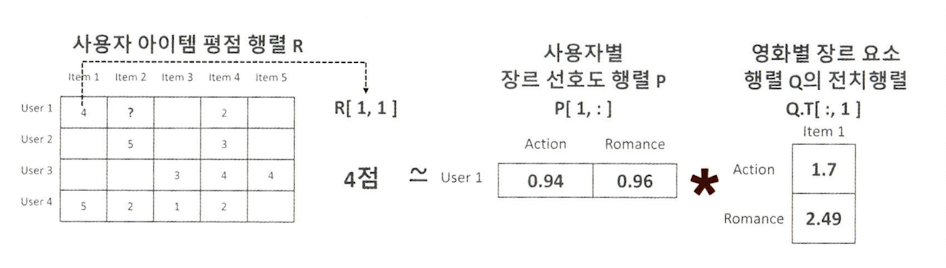

In [11]:
display(Image(filename="/Users/ijiseon/Desktop/잠재요인설명1.png"))

1. 사용자-잠재요인 행렬을 사용자의 영화 장르별 선호도 행렬 P라고 가정
2. 아이템-잠재요인 행렬은 영화별 여러 자을 요소로 구성된 영화의 장르별 요소 행렬 Q로 가정 

**평점이란 사용자인 특정 영화 장르에 대한 선호도와 개별 영화의 그 장르적 특성값을 반영해 결정된다고 생각할 수 있음. 예를 들어 사용자가 액션 영화를 매우 좋아하고, 특정 영화가 액션 영화의 특성이 매우 크다면 사용자가 해당 영화에 높은 평점을 줄 것입니다. 따라서 평점은 사용자의 장르별 선호도 벡터와 영화의 장르별 특성 벡터를 서로 곱해서 만들 수 있습니다**

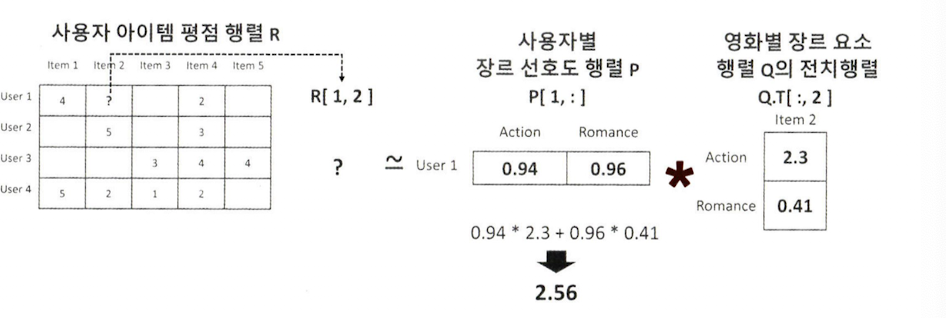

In [12]:
display(Image(filename="/Users/ijiseon/Desktop/잠재요인설명2.png"))

아직 User1이 평점을 매기지 못한 Item2에 대한 예측 평점 수행

: R(1,2)는 행렬 분해된 P 매트릭스의 User1 벡터와 Q,T 매트릭스 Item 2 벡터의 내적 결괏값인 2.56으로 예측

---------------------------------------------------------------

> #### 확률적 경사 하강법을 이용한 행렬분해 

1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q행렬을 적절한 값으로 각각 업데이트 
4. 만족할 만한 오류 값을 가질 때까지 2,3 번 작업을 반복하면서 P와 Q값을 업데이트해 근사화 

In [33]:
import numpy as np


R = np.array([
    [4, np.nan, np.nan, 2, np.nan],
    [np.nan, 5, np.nan, 3, 1],
    [np.nan, np.nan, 3, 4, 4],
    [5, 2, 1, 2, np.nan],
    [np.nan, np.nan, 1, 4, np.nan],
])


num_users, num_items = R.shape

In [34]:
K = 3 #잠재요인 차원 설정

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다

np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users,K))
Q = np.random.normal(scale=1./K, size=(num_users,K))

In [35]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P,Q.T)
    
    #실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [36]:
# R>0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장

non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0 ]

In [37]:
steps = 1000
learning_rate = 0.01
r_lambda = 0.01

#SGD 기법으로 P와 Q 매트릭스를 계속 업데이트

for step in range(steps):
    for i,j,r in non_zeros:
        #실제값과 예측값의 차이인 오류값 구함
        eij = r - np.dot(P[i,:],Q[j,:].T)
        #Regularzation을 반영한 SGD 업데이트 공식 적용
        P[i,:]= P[i,:] + learning_rate*(eij*Q[j,:] - r_lambda*P[i,:])
        Q[j,:]= Q[j,:] + learning_rate*(eij*P[i,:] - r_lambda*Q[j,:])
    rmse = get_rmse(R,P,Q,non_zeros)
    if (step%50)==0:
        print("### iteration step:",step,"rmse:",rmse)

### iteration step: 0 rmse: 3.1526161446059358
### iteration step: 50 rmse: 0.5349801505674959
### iteration step: 100 rmse: 0.28211419381059205
### iteration step: 150 rmse: 0.16300961454217575
### iteration step: 200 rmse: 0.08769108429458307
### iteration step: 250 rmse: 0.05296136598939796
### iteration step: 300 rmse: 0.03756419629513072
### iteration step: 350 rmse: 0.029992973315293044
### iteration step: 400 rmse: 0.026010160756955034
### iteration step: 450 rmse: 0.023836886133931152
### iteration step: 500 rmse: 0.02260964434003938
### iteration step: 550 rmse: 0.021887560727376954
### iteration step: 600 rmse: 0.021440350099923067
### iteration step: 650 rmse: 0.021145056167971785
### iteration step: 700 rmse: 0.020934693766974814
### iteration step: 750 rmse: 0.020772229354801268
### iteration step: 800 rmse: 0.020637011936391465
### iteration step: 850 rmse: 0.020517485668155446
### iteration step: 900 rmse: 0.02040718622397991
### iteration step: 950 rmse: 0.0203025091334

In [38]:
pred_matrix = np.dot(P,Q.T)
print("예측행렬:\n",np.round(pred_matrix,3))

예측행렬:
 [[ 3.994  1.744  0.36   1.996  1.117]
 [ 9.551  4.967  0.154  2.987  0.999]
 [ 1.877 -1.286  2.979  3.984  3.988]
 [ 4.961  2.033  0.996  2.013  1.231]
 [ 3.659  0.717  1.011  3.975  2.968]]
